<a href="https://colab.research.google.com/github/NayonikaSharma/machine_learning/blob/master/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the dataset and exploring it

In [ ]:
dataset = pd.read_csv("housing.csv")

In [ ]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
dataset.info() #to check if we have any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#just drop these nan (not a number) entries
dataset.dropna(inplace = True) #"inplace = true" takes the data, drops the nan values and saves the result in the data object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#Splitting data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.drop(['median_house_value'], axis = 1) #everything except the target val and axis=1 since we are dropping a column
y = dataset['median_house_value'] #only the target val

In [ ]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [ ]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#now we will join X_train and y_train so that we can analyse some basic correlations
train_data = X_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15610,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,<1H OCEAN,259900.0
12478,-121.48,38.59,52.0,1186.0,341.0,1038.0,320.0,1.6116,INLAND,70500.0
5996,-117.73,34.09,36.0,1543.0,297.0,1355.0,303.0,3.5313,INLAND,117800.0
11827,-121.02,39.01,17.0,4786.0,799.0,2066.0,770.0,3.9734,INLAND,185400.0
5183,-118.26,33.94,41.0,1510.0,410.0,1408.0,389.0,1.6500,<1H OCEAN,94200.0
...,...,...,...,...,...,...,...,...,...,...
13246,-117.63,34.12,4.0,4323.0,775.0,1479.0,663.0,6.0758,INLAND,226800.0
19844,-119.09,36.42,17.0,877.0,219.0,966.0,218.0,2.0000,INLAND,52500.0
9944,-122.26,38.16,23.0,2840.0,491.0,1586.0,466.0,4.0337,NEAR BAY,130400.0
10908,-117.86,33.74,9.0,525.0,171.0,1257.0,165.0,3.3750,<1H OCEAN,165300.0


#Basic exploration of the numeric features

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

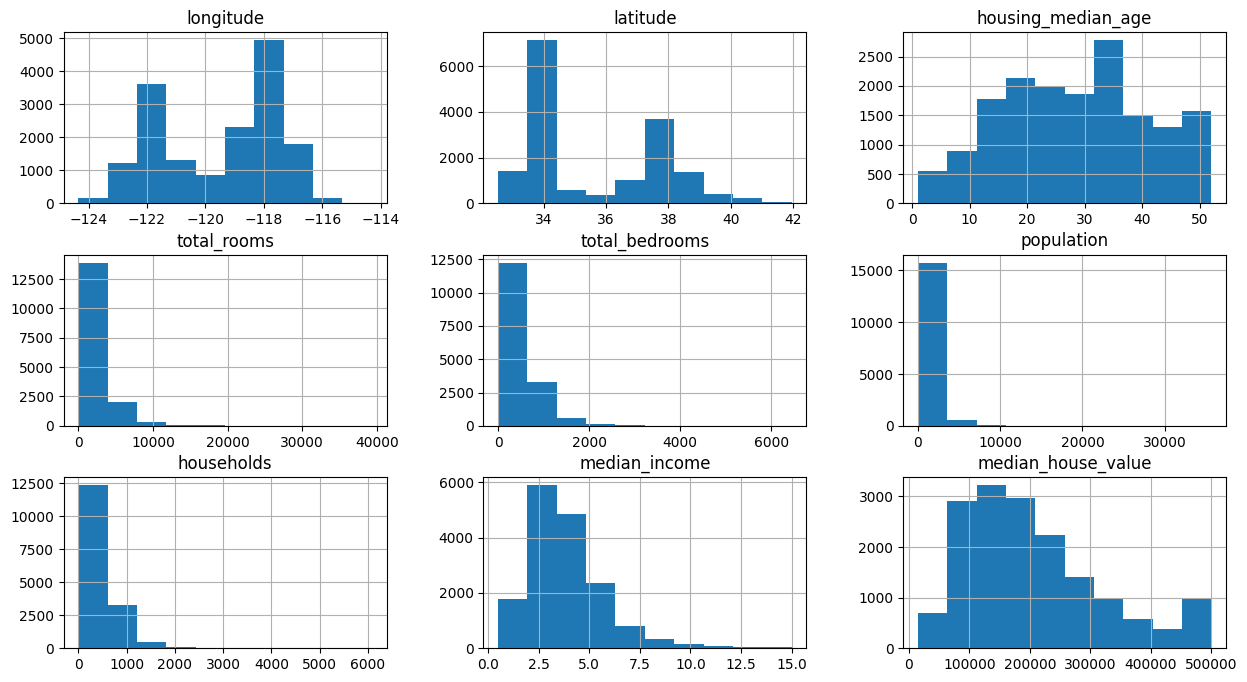

In [ ]:
train_data.hist(figsize = (15,8)) #we will get multiple histograms for the distributions of the individual features

In [ ]:
train_data.corr() #gives us a correlation matrix|

<ipython-input-114-c21356644ae2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr() #gives us a correlation matrix|


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924855,-0.108972,0.044112,0.068264,0.098651,0.055665,-0.011551,-0.046276
latitude,-0.924855,1.000000,0.012083,-0.037114,-0.067702,-0.108487,-0.072715,-0.083271,-0.144174
housing_median_age,-0.108972,0.012083,1.000000,-0.358566,-0.319112,-0.292397,-0.300634,-0.118274,0.107539
total_rooms,0.044112,-0.037114,-0.358566,1.000000,0.929523,0.854883,0.919955,0.199294,0.134835
total_bedrooms,0.068264,-0.067702,-0.319112,0.929523,1.000000,0.874058,0.980793,-0.005700,0.051644
population,0.098651,-0.108487,-0.292397,0.854883,0.874058,1.000000,0.902333,0.007928,-0.023004
households,0.055665,-0.072715,-0.300634,0.919955,0.980793,0.902333,1.000000,0.015718,0.067404
median_income,-0.011551,-0.083271,-0.118274,0.199294,-0.005700,0.007928,0.015718,1.000000,0.687664
median_house_value,-0.046276,-0.144174,0.107539,0.134835,0.051644,-0.023004,0.067404,0.687664,1.000000


<ipython-input-115-e462cd8896b4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu") #annotations = true so we can see the actual correlation numbers,


<Axes: >

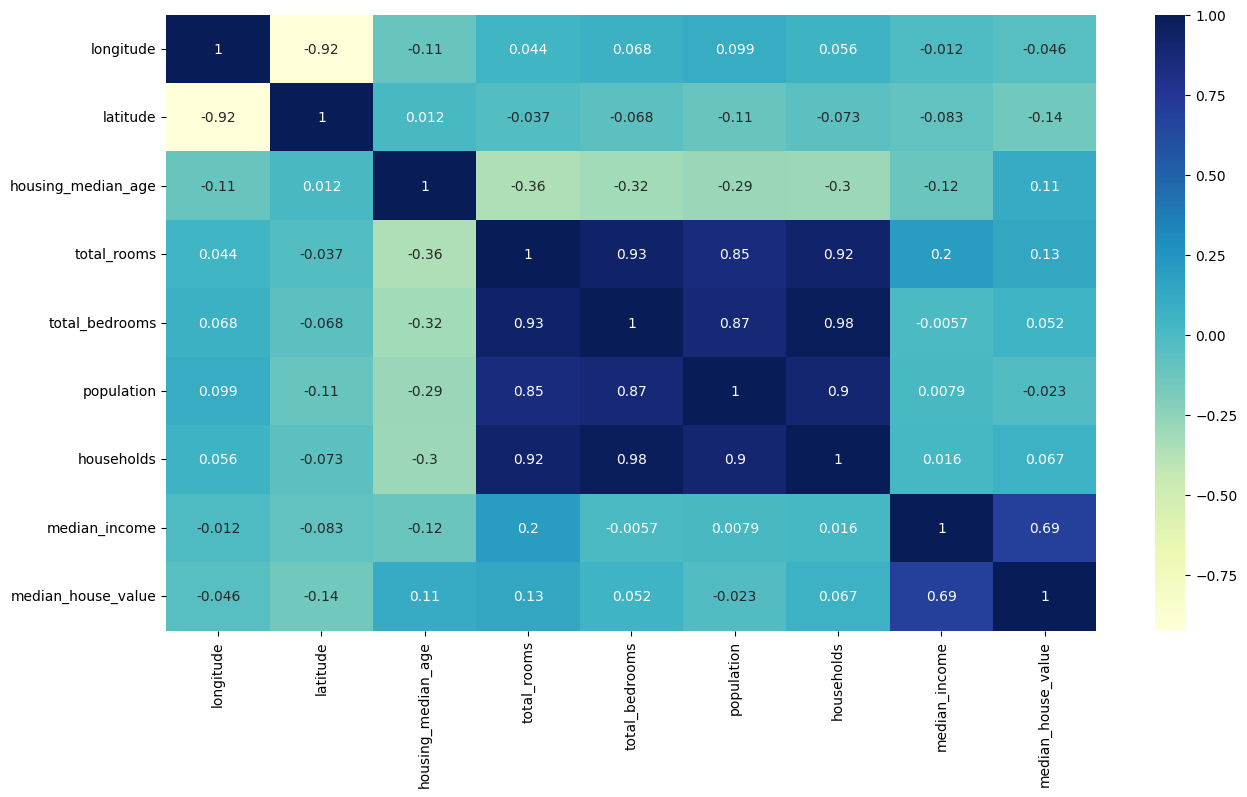

In [ ]:
#now we will plot a heat map based on this matrix
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu") #annotations = true so we can see the actual correlation numbers,
#cmap => color map = yellow green blue

#Data Preprocessing

In [ ]:
#since the hist for total_rooms, total_bedrooms, population and households are a little skewed, we will take the log of
#these features and see what the distribution looks like
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1) #to prevent zero values, we will do +1
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

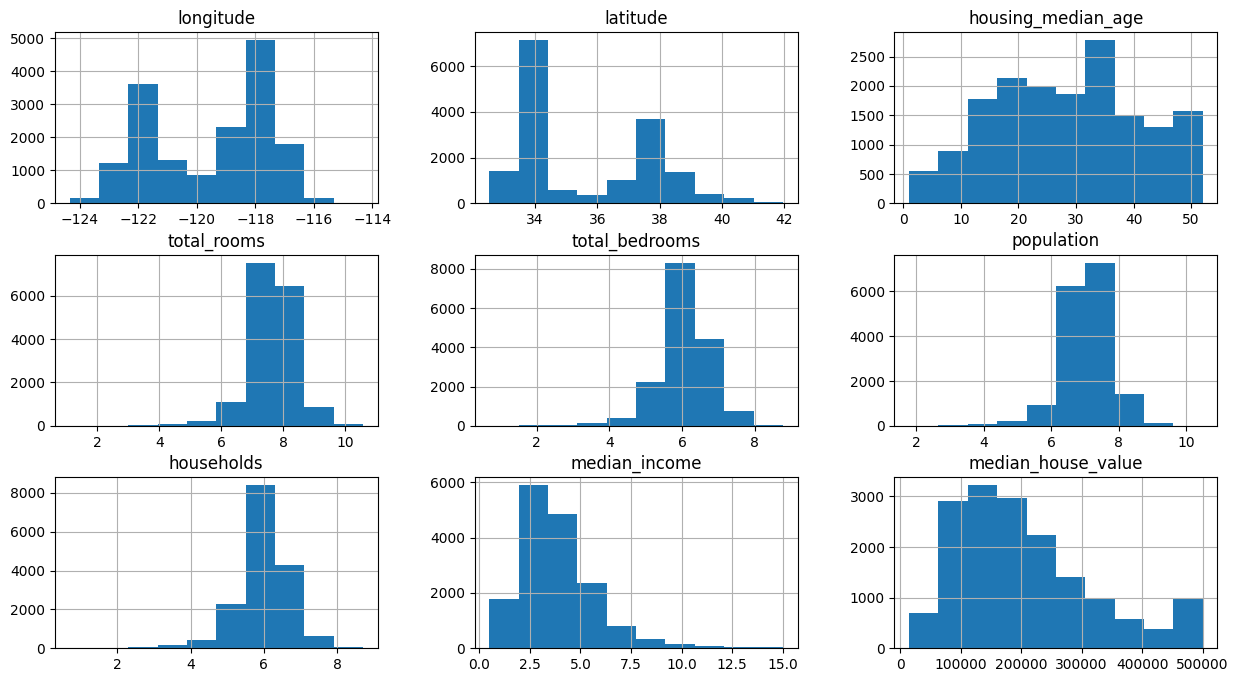

In [ ]:
train_data.hist(figsize = (15,8))

###One hot encoding for categorical variables

In [ ]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7211
INLAND        5202
NEAR OCEAN    2114
NEAR BAY      1815
ISLAND           4
Name: ocean_proximity, dtype: int64

In [ ]:
#get dummy variables using pandas and then joining it with our training data
dummy_var = pd.get_dummies(train_data.ocean_proximity)
train_data = train_data.join(dummy_var).drop(['ocean_proximity'], axis = 1) #then we drop ocean proximity because we have dummy columns for that now

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15610,-116.87,32.72,13.0,8.092239,6.198479,7.266827,6.222576,5.7652,259900.0,1,0,0,0,0
12478,-121.48,38.59,52.0,7.079184,5.834811,6.946014,5.771441,1.6116,70500.0,0,1,0,0,0
5996,-117.73,34.09,36.0,7.342132,5.697093,7.212294,5.717028,3.5313,117800.0,0,1,0,0,0
11827,-121.02,39.01,17.0,8.473659,6.684612,7.633854,6.647688,3.9734,185400.0,0,1,0,0,0
5183,-118.26,33.94,41.0,7.320527,6.018593,7.250636,5.966147,1.6500,94200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13246,-117.63,34.12,4.0,8.371936,6.654153,7.299797,6.498282,6.0758,226800.0,0,1,0,0,0
19844,-119.09,36.42,17.0,6.777647,5.393628,6.874198,5.389072,2.0000,52500.0,0,1,0,0,0
9944,-122.26,38.16,23.0,7.951911,6.198479,7.369601,6.146329,4.0337,130400.0,0,0,0,1,0
10908,-117.86,33.74,9.0,6.265301,5.147494,7.137278,5.111988,3.3750,165300.0,1,0,0,0,0


<Axes: >

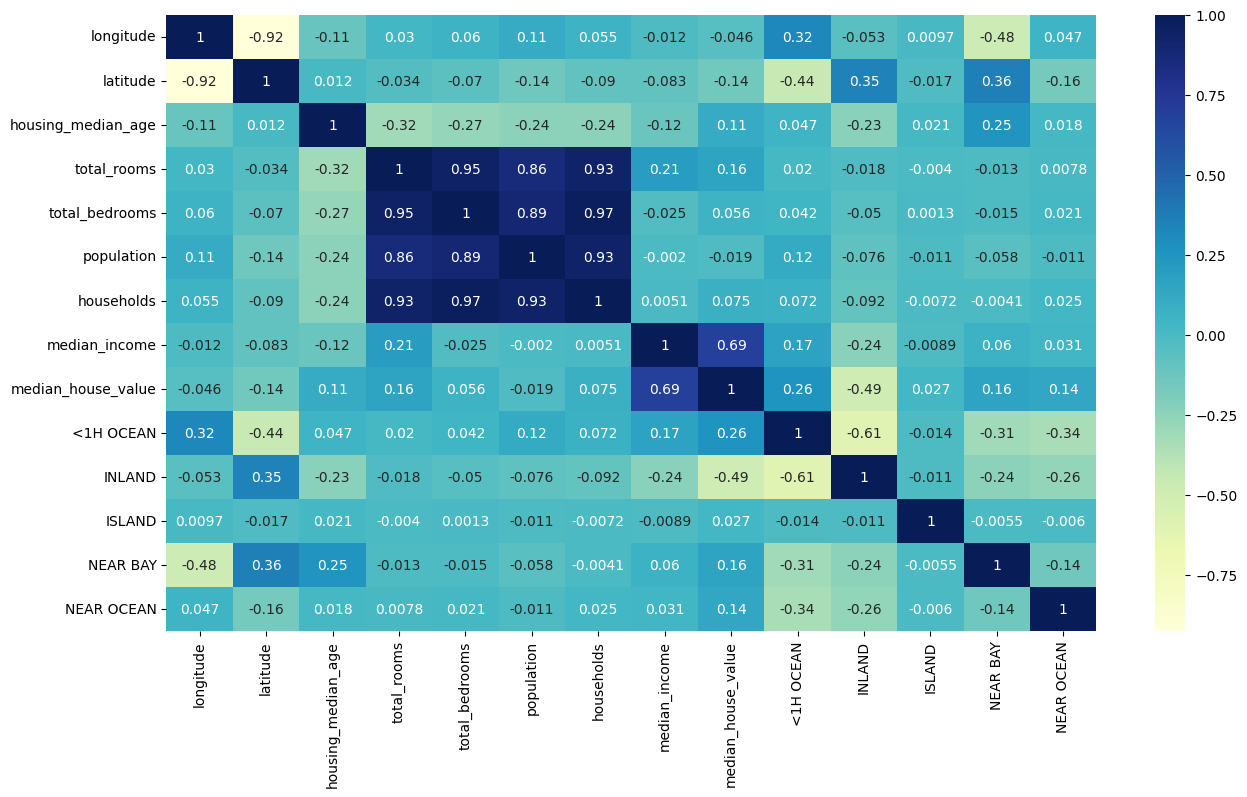

In [ ]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

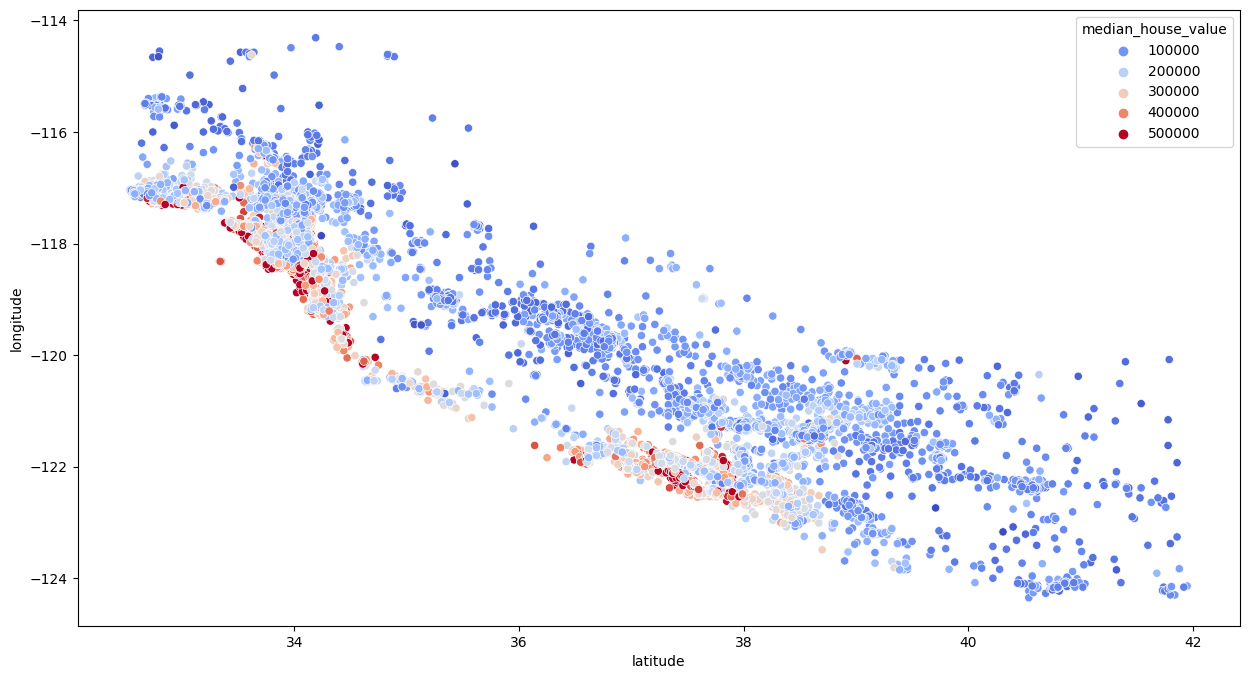

In [ ]:
#visualise the coordinates
#to see how the proximity and the position of the individual blocks influences the prices
plt.figure(figsize = (15, 8))
sns.scatterplot(x = "latitude", y = "longitude", data = train_data, hue = "median_house_value", palette = "coolwarm") #hue = target val

###Feature Engineering
(It involves selecting, extracting, transforming, and creating new features from the available data to improve the performance of machine learning algorithms.)

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households'] #number of rooms per household

<Axes: >

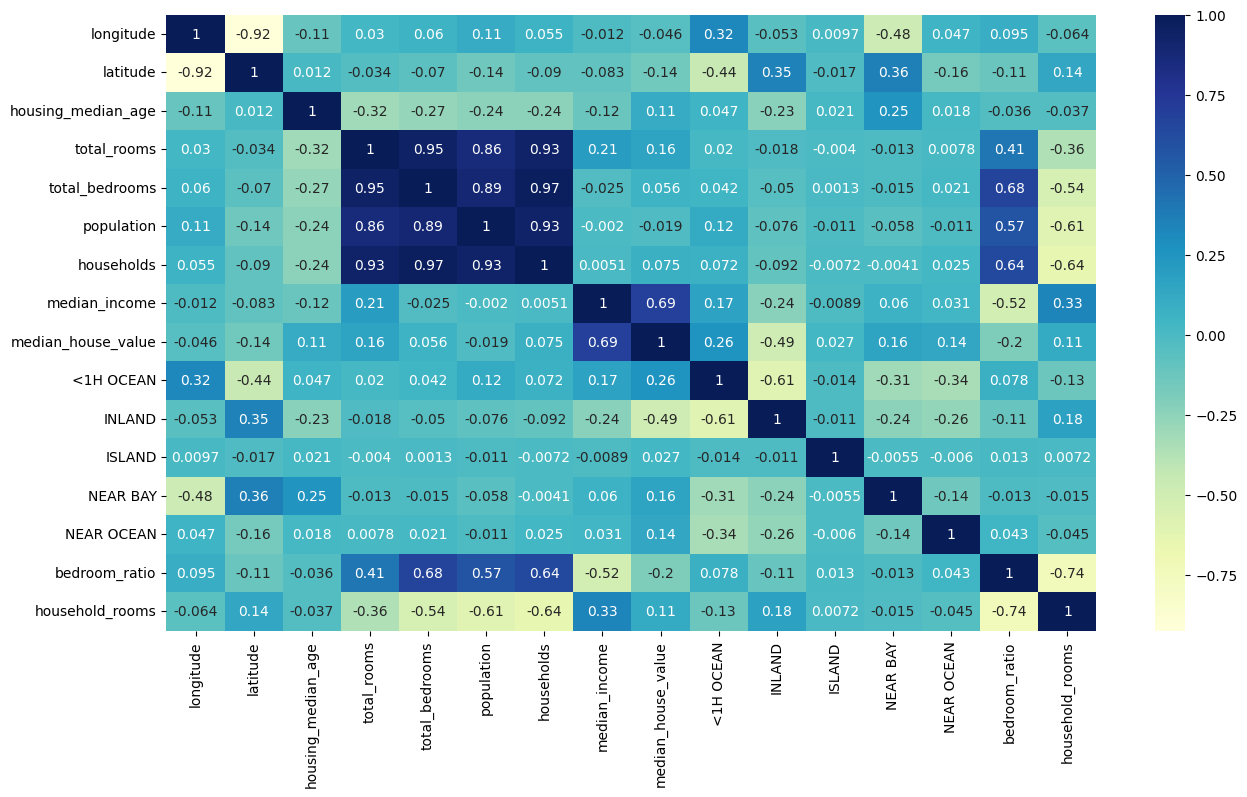

In [ ]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

#Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

#need to split again (to include the new features)
X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#now working with the test data
#joining x test and y test to form out test data
test_data = X_test.join(y_test)
#fixing the skewed distributions
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1) #to prevent zero values, we will do +1
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
#dummy variables for ocean proximity
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)
#feature engineering
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households'] #number of rooms per household

In [ ]:
X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [ ]:
regressor.score(X_test, y_test) #not that great of a score

0.6779323344640635

#Random Forest Model

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor()
#first, we start with the default parameters
forest_regressor.fit(X_train_s, y_train)

RandomForestRegressor()

In [ ]:
forest_regressor.score(X_test_s, y_test)

0.8143720873033449

### Hyperparameter Tuning - Grid Search with Cross Validation(K-folds)

In [ ]:
from sklearn.model_selection import GridSearchCV
#specifying the hyperparameters that we want to try
parameter_grid = {
    "n_estimators": [100, 200, 300], #default = 100
    "min_samples_split": [2, 4], #default = 2
    "max_depth": [None, 4, 8] #default = None
}
grid_search = GridSearchCV(forest_regressor, parameter_grid, cv = 5,
                           scoring = "neg_mean_squared_error",
                           return_train_score = True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest_regressor = grid_search.best_estimator_

In [ ]:
best_forest_regressor.score(X_test_s, y_test)

0.8156442768922079